# 4. 라이브러리
## 4.3. MatplotLib 라이브러리
### 4.3.1 데이터 시각화
+ 데이터 시각화(data visualization)
  + 데이터 분석 결과를 쉽게 이해할 수 있도록 표현하고 전달되는 과정
  + 복잡한 정보를 한 눈에 파악하고, 숨겨진 패턴이나 관계를 드러냄
  + 탐색적 자료 분석(EDA), 결과 해석, 의사결정 등에 폭넓게 활용

<br>

+ MatplotLib
  + 넘파이 배열을 기반으로 만들어진 다중 플랫폼 데이터 시각화 라이브러리
  + 다양한 운영체제와 그래픽 백엔드에서 안정적으로 작동


<br>

### 4.3.2 데이터 시각화 유형

|유형|설명|
|:---:|:------------|
|선 그래프 (line plot)|- 시계열 데이터의 추세 표현 <br>- 색상(`color`), 선 종류(`linestyle`), 마커(`marker`) 등|
|막대 그래프 (bar plot)|- 범주형 데이터의 값 비교 <br>- 색상(`color`), 너비(`width`), 정렬(`align`) 등|
|히스토그램 (histogram)|- 연속형 데이터의 분포 파악 <br>- 색상(`color`), 구간 수(`bins`), 누적 여부(`cumulative`) 등|
|산점도 (scatter plot)|- 두 연속형 변수 사이의 관계 표현 <br>- 색상(`c`), 점 크기(`s`), 투명도(`alpha`) 등|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 실습 데이터 : air_quality 데이터셋
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv")

In [3]:
# city: 측정 도시
# country: 측정 국가
# date.utc: 측정 일시(UTC)
# location: 측정 위치
# parameter: 측정 항목
# value: 측정 값
# unit: 측정 단위
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB
None


In [4]:
print(air_quality.head())

    city country                   date.utc location parameter  value   unit
0  Paris      FR  2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR  2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR  2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR  2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR  2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


In [5]:
air_quality['city'].value_counts()

city
Paris        1004
London        969
Antwerpen      95
Name: count, dtype: int64

In [6]:
air_quality['parameter'].value_counts()

parameter
no2    2068
Name: count, dtype: int64

In [7]:
# date.utc 열을 datetime 형식으로 변환
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [8]:
print(air_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB
None


In [9]:
print(air_quality.head())

    city country                  date.utc location parameter  value   unit
0  Paris      FR 2019-06-21 00:00:00+00:00  FR04014       no2   20.0  µg/m³
1  Paris      FR 2019-06-20 23:00:00+00:00  FR04014       no2   21.8  µg/m³
2  Paris      FR 2019-06-20 22:00:00+00:00  FR04014       no2   26.5  µg/m³
3  Paris      FR 2019-06-20 21:00:00+00:00  FR04014       no2   24.9  µg/m³
4  Paris      FR 2019-06-20 20:00:00+00:00  FR04014       no2   21.4  µg/m³


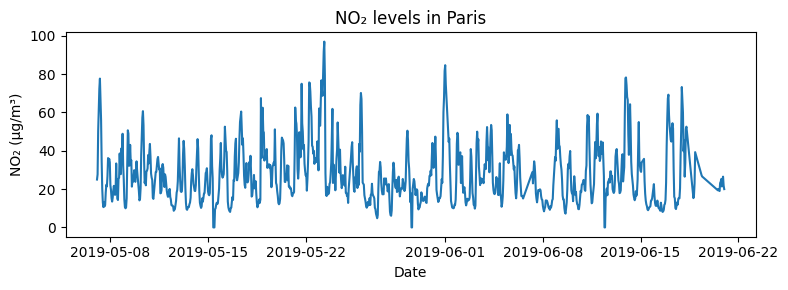

In [10]:
## 선 그래프
# 1) Paris의 NO2 농도 변화: 기본 선 그래프
paris_data = air_quality[air_quality["city"] == "Paris"]

plt.figure(figsize=(8, 3))
plt.plot(paris_data["date.utc"], paris_data["value"])
plt.title("NO₂ levels in Paris")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

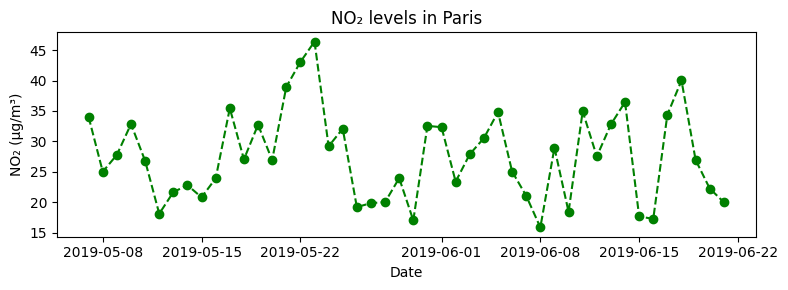

In [11]:
## 선 그래프
# 2) Paris의 NO2 농도 변화: 리샘플링(1시간 → 일간), 커스터마이징(색상, 선 종류, 마커)
# 색상: r, g, b, c, m, y, k, w
# 선 종류: -, --, -., :
# 마커: o, +, D, s, ^, v, .
value_day = paris_data.set_index('date.utc')['value'].resample('D').mean()

plt.figure(figsize=(8, 3))
#plt.plot(value_day.index, value_day, color="green", linestyle="--", marker="o")
plt.plot(value_day.index, value_day, "g--o")
plt.title("NO₂ levels in Paris")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

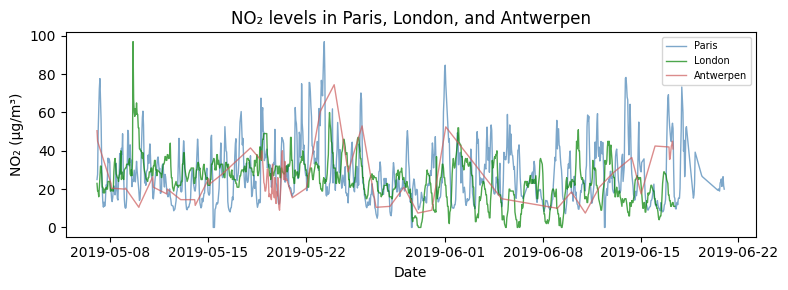

In [12]:
## 선 그래프
# 3) 세 도시의 NO2 농도 변화
cities = ['Paris', 'London', 'Antwerpen']
colors = ['steelblue', 'green', 'indianred']

plt.figure(figsize=(8, 3))

for i, city in enumerate(cities):
    city_data = air_quality[air_quality["city"] == city]
    plt.plot(city_data['date.utc'], city_data['value'],
             label=city, color=colors[i],
             linewidth=1, alpha=0.7)

plt.title("NO₂ levels in Paris, London, and Antwerpen")
plt.xlabel("Date")
plt.ylabel("NO₂ (µg/m³)")
plt.legend(loc = 'upper right', fontsize=7)
plt.tight_layout()
plt.show()

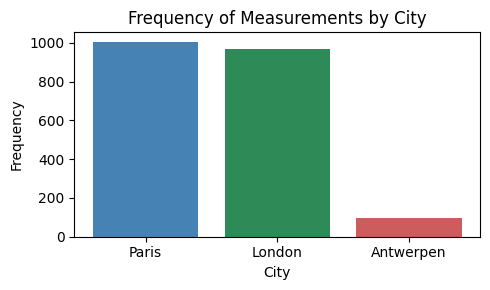

In [13]:
## 막대 그래프
# 1) 도시의 측정 빈도
city_counts = air_quality['city'].value_counts()

plt.figure(figsize=(5, 3))
plt.bar(city_counts.index, city_counts.values, color=['steelblue', 'seagreen', 'indianred'])
plt.title("Frequency of Measurements by City")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

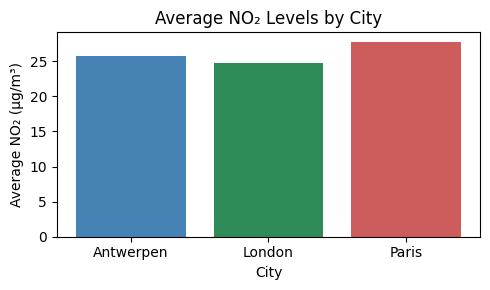

In [14]:
## 막대 그래프
# 2) 도시별 평균 NO₂ 농도
city_avg = air_quality.groupby('city')['value'].mean()

plt.figure(figsize=(5, 3))
plt.bar(city_avg.index, city_avg.values, color=['steelblue', 'seagreen', 'indianred'])
plt.title("Average NO₂ Levels by City")
plt.xlabel("City")
plt.ylabel("Average NO₂ (µg/m³)")
plt.tight_layout()
plt.show()

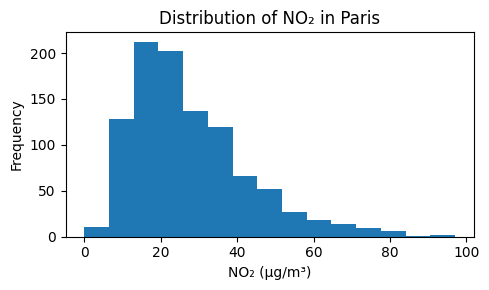

In [15]:
## 히스토그램
# 1) Paris의 NO2 농도 분포
paris_data = air_quality[air_quality["city"] == "Paris"]

plt.figure(figsize=(5, 3))
plt.hist(paris_data["value"], bins=15)
plt.title("Distribution of NO₂ in Paris")
plt.xlabel("NO₂ (µg/m³)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

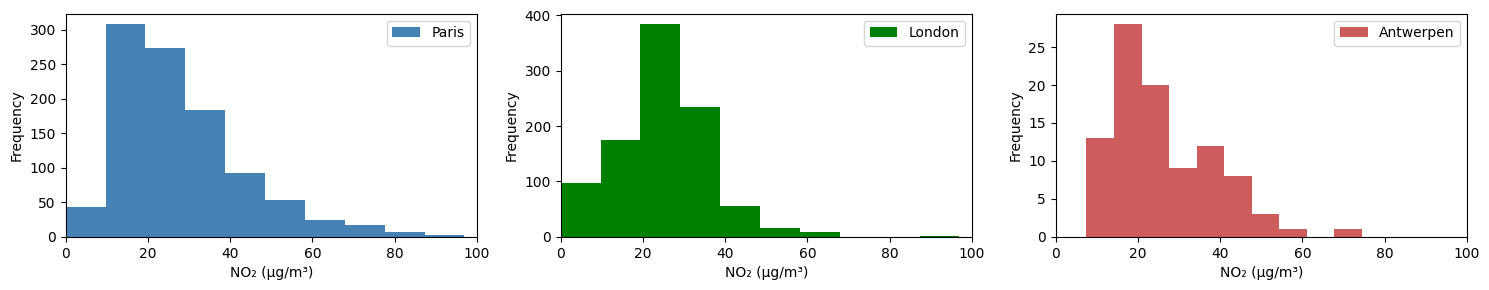

In [16]:
## 히스토그램, 다중 그래프
# 2) 세 도시의 NO2 농도 분포
cities = ['Paris', 'London', 'Antwerpen']
colors = ['steelblue', 'green', 'indianred']

plt.figure(figsize=(15, 3))

for i, city in enumerate(cities):
    city_data = air_quality[air_quality["city"] == city]
    plt.subplot(1, 3, i+1)
    plt.hist(city_data['value'],
             label=city, color=colors[i])
    
    plt.xlabel("NO₂ (µg/m³)")
    plt.ylabel("Frequency")
    plt.legend(loc = 'upper right')
    plt.xlim(0, 100)

plt.tight_layout()
plt.show()

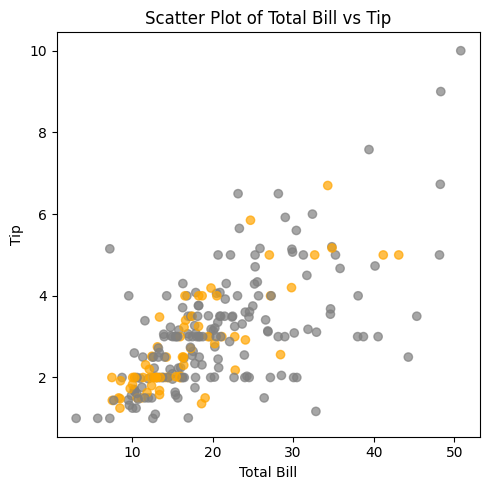

In [17]:
## 산점도
# 전체 금액과 팁 금액 관계
import seaborn as sns
tips = sns.load_dataset("tips")

plt.figure(figsize=(5, 5))
plt.scatter(tips['total_bill'], tips['tip'],
           c=tips['time'].map({'Lunch': 'orange', 'Dinner': 'gray'}), alpha=0.7)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.tight_layout()